In [1]:
import os
os.chdir('..')
from notebooks import config
import numpy as np
from utils.geotif_io import readTiff, writeTiff
from utils.imgShow import imgShow
from utils.metric import acc_matrix
import matplotlib.pyplot as plt


In [3]:
tile_id = '16'

path_as = config.root_proj + '/data/dset/s1_ascend/s1_as_scene_' + tile_id + '.tif'
path_des = config.root_proj + '/data/dset/s1_descend/s1_des_scene_' + tile_id + '.tif'
path_truth = config.root_proj + '/data/dset/s1_truth/s1_scene_' + tile_id + '_truth.tif'
path_wat = config.root_proj + '/data/dset/s1_water/s1_as_scene_' + tile_id + '_water.tif'

## -- data read
s1_as, s1_as_info = readTiff(path_in = path_as)
s1_des, s1_des_info = readTiff(path_in = path_des)
s1_truth, s1_truth_info = readTiff(path_in = path_truth)
s1_wat, s1_wat_info = readTiff(path_in = path_wat)
s1_img = np.concatenate((s1_as, s1_des), axis=2)
print(s1_as.shape, s1_des.shape, s1_truth.shape, s1_wat.shape)



(3326, 3511, 2) (3326, 3511, 2) (3326, 3511) (3326, 3511)


In [42]:
acc_oa, prod, user, confus_mat = acc_matrix(s1_wat,  sam_pixel=None, truth_map=s1_truth, id_label=1)
print(acc_oa, prod, user, confus_mat)


0.999 0.9966 0.9505 [[11460035    10733]
 [     701   206117]]


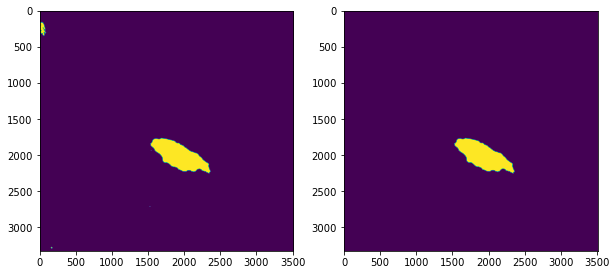

In [4]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
imgShow(s1_wat)
plt.subplot(1,2,2)
imgShow(s1_truth)
